<div align="left" style="font-weight: bold; font-family: Computer Modern; font-size: 24px; text-align: left; line-height: 1.5;">
    Universidade Federal da Bahia
    <br>
    Departamento de Engenharia Elétrica e da Computação
    <br>
    Disciplina: ENGG67 - Introdução ao Aprendizado de Máquina
    <br>
    Docente: Antônio Fernandes
    <br>
    Discentes: Márcio Barros e Gabriel Correia
</div>

<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 32px;text-align: left;">
    Avaliação 02: Algoritmo KNN
</h2>

Os trabalhos aqui apresentados foram escritos de forma contínua sendo realizadas Considerações ao final de cada bloco para facilitar o entendimento tanto do leitor quanto da dupla que estava desenvolvendo o códio. Tentamos deixar tudo com o maior número possível de observações e textos auxiliadores explicando passo-a-passo dos programas. Na primeira questão, inclusive, foi respondida de duas formas diferentes para que o leitor possa tirar suas próprias conclusões à respeito da aplicação do algoritmo PCA em banco de dados pequenos, enquanto que, na questão dois, a aplicação do PCA foi fundamental para simplificar a análise, eliminar redundâncias e identificação de padrões. 


<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 22px;text-align: left;">
    1) Utilizando o banco de dados “Iris Flower Data Set”, aborde o problema declassificação utilizando o algoritmo k-NN. 
</h2> 


Resultados Obtidos no Programa: 


c:\Users\gcorr\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



Tabela Inicial (Primeiros 5 e Últimos 5 valores):


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



Tabela de Acurácia para cada valor de K (sem aplicação do PCA):


,K,Acurácia Média
0,1,0.946667
1,2,0.946667
2,3,0.953333
3,4,0.953333
4,5,0.960000
...,...,...
15,16,0.933333
16,17,0.926667
17,18,0.940000
18,19,0.953333



Melhor valor de K: 6


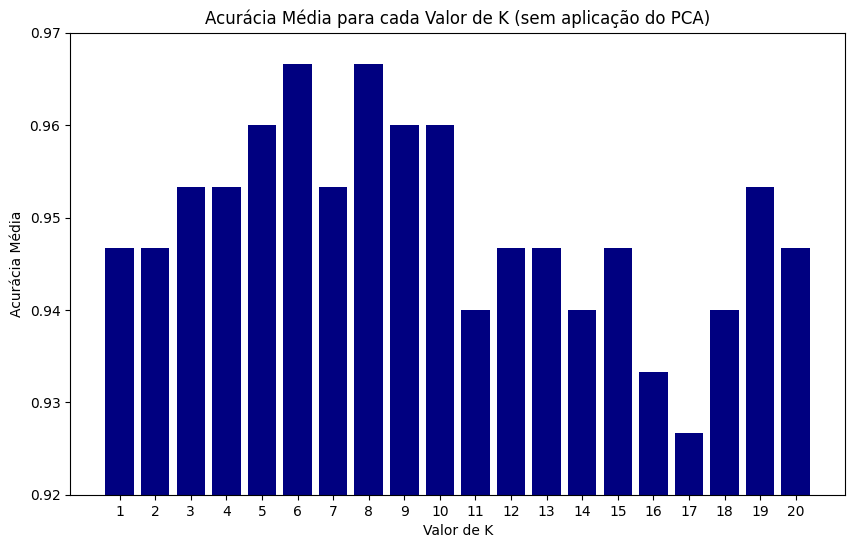

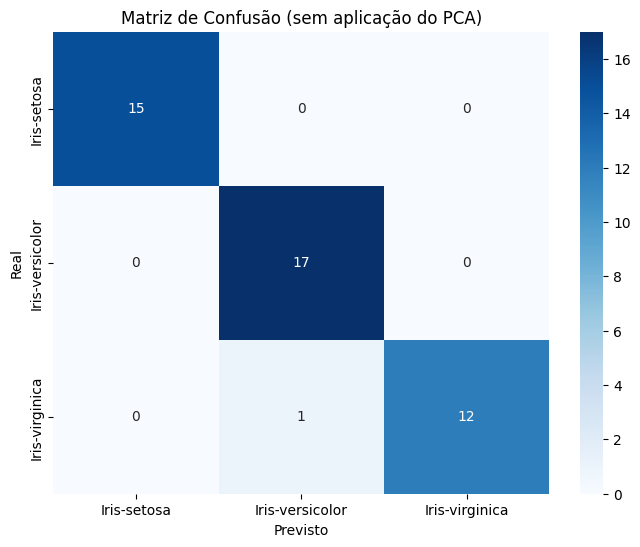


Métricas de Avaliação de Desempenho (sem aplicação do PCA):


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,15.000000
Iris-versicolor,0.944444,1.000000,0.971429,17.000000
Iris-virginica,1.000000,0.923077,0.960000,13.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.981481,0.974359,0.977143,45.000000
weighted avg,0.979012,0.977778,0.977651,45.000000


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

plt.close('all')
print('Resultados Obtidos no Programa: ')

# Configurar pandas para mostrar os primeiros e últimos 5 valores
pd.set_option('display.max_rows', 10)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url, verify=False)

# Salva o arquivo no sistema local
with open("iris.data", "wb") as file:
    file.write(response.content)

# Ler os dados do arquivo CSV baixado
column_names = ["sepal_length", "sepal_width",
                "petal_length", "petal_width", "class"]
iris_data = pd.read_csv("iris.data", header=None, names=column_names)

# Exibir a tabela inicial
print("\nTabela Inicial (Primeiros 5 e Últimos 5 valores):")
display(pd.concat([iris_data.head(), pd.DataFrame(["..."] * (len(iris_data) - 10)).set_index([0]), iris_data.tail()]))

# Pré-processamento dos dados
X = iris_data.drop(columns=['class'])
y = iris_data['class']

# Padronização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)

# Tabela de Acurácia para cada valor de K
k_values = list(range(1, 21))  # Testar K de 1 a 20
accuracy_values = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_scaled, y, cv=5) #Validação cruzada utilizando 5 dobras (folds)
    accuracy_values.append(scores.mean())
best_k = k_values[np.argmax(accuracy_values)]

# Tabela de Acurácia para cada valor de K
accuracy_table = pd.DataFrame({'K': k_values, 'Acurácia Média': accuracy_values})
print("\nTabela de Acurácia para cada valor de K (sem aplicação do PCA):")
display(accuracy_table)
print(f"\nMelhor valor de K: {best_k}")

# Plotar gráfico de barras para a acurácia em função de K
plt.figure(figsize=(10, 6))
plt.bar(accuracy_table['K'], accuracy_table['Acurácia Média'], color='navy') 
plt.xlabel('Valor de K')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média para cada Valor de K (sem aplicação do PCA)')
plt.ylim(0.92, 0.97)  # Define os limites do eixo Y

# Ajusta o eixo X para mostrar apenas valores inteiros sem o zero
plt.xticks(np.arange(1, 21, 1))
plt.show()

# Treinamento final com o melhor valor de K
final_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_classifier.fit(x_train, y_train)

# Previsões nos dados de teste
y_pred = final_classifier.predict(x_test)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=iris_data['class'].unique(), index=iris_data['class'].unique())

# Métricas de Avaliação de Desempenho
classification_rep = classification_report(y_test, y_pred, target_names=iris_data['class'].unique(), output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão (sem aplicação do PCA)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Mostrar Métricas de Avaliação de Desempenho
print("\nMétricas de Avaliação de Desempenho (sem aplicação do PCA):")
display(classification_df)


CONSIDERAÇÕES:

No último trabalho vimos que o banco de dados trabalhado não possuia erro de dados e nem ruídos consideraveis. Também havia poucas repetiçoes. Com isso, não há necessidade de tratar os dados e podemos realizar a normalização diretamente. Nesta célula também realizamos a separação do grupo de teste e treinamento, usando a base comum de 70% para treinamento e 30% para teste. 

Um outro ponto importante reside no fato de que não precisamos aplicar a técnica PCA para a redução de dimensionalidade dos dados, visto que o Iris.data apresenta um banco pequeno de dados. Sendo assim, a análise direta de seus dados pode nos fornecer informações mais significativas dos que os dados correlacionados pós aplicação do PCA. 

Os resultados provenientes da validação cruzada revelam um bom desempenho  do modelo proposto (escolhemos 5 folds por ser um valor aceitável dentro da realidade do tamanho da base de dados e, por tentativa e erro, ter se mostrado um bom valor). A acurácia média, calculada ao longo de 5 folds, atinge aproximadamente 96.67%. 

A análise da matriz de confusão destaca a robustez do modelo, com taxas de verdadeiros positivos de 100% para a classe 'Iris-setosa' e percentuais de precisão e recall em torno de 93% a 94% para as classes 'Iris-versicolor' e 'Iris-virginica'. A presença mínima de falsos positivos e falsos negativos evidencia a confiabilidade do modelo.

A precisão, variando de 93% a 100%, destaca a capacidade do modelo em prever corretamente as instâncias de cada classe. O recall, indicando a habilidade de capturar todas as instâncias de uma classe, é consistente, oscilando entre 93% e 100%. O F1-score, equilibrando precisão e recall, mantém-se em torno de 94% para todas as classes, refletindo um desempenho equilibrado.

Em conclusão, os resultados obtidos posicionam um modelo competente na tarefa de classificação das espécies de íris. Sua capacidade de generalização entre diferentes conjuntos de dados sugere sua utilidade em aplicações práticas. No entanto, seria prudente considerar análises adicionais e tratamento prévios como a realização do PCA.

Sendo assim, faremos o treinamento dos dados com aplicação do PCA:

Resultados Obtidos no Programa: 


c:\Users\gcorr\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



Tabela Inicial (Primeiros 5 e Últimos 5 valores):


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



Tabela de Acurácia para cada valor de K (com aplicação do PCA):


,K,Acurácia Média
0,1,0.873333
1,2,0.840000
2,3,0.900000
3,4,0.893333
4,5,0.913333
...,...,...
15,16,0.920000
16,17,0.920000
17,18,0.926667
18,19,0.913333



Melhor valor de K: 18


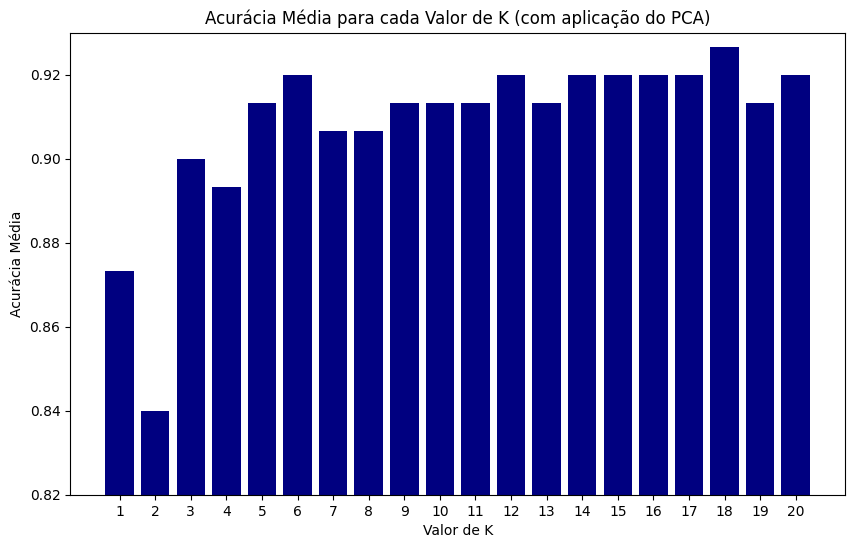

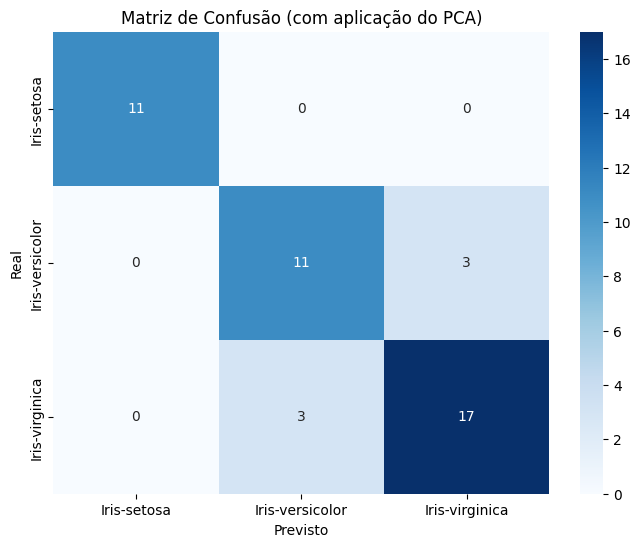


Métricas de Avaliação de Desempenho (com aplicação do PCA):


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,11.000000
Iris-versicolor,0.785714,0.785714,0.785714,14.000000
Iris-virginica,0.850000,0.850000,0.850000,20.000000
accuracy,0.866667,0.866667,0.866667,0.866667
macro avg,0.878571,0.878571,0.878571,45.000000
weighted avg,0.866667,0.866667,0.866667,45.000000


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA  #Adicionado para PCA

plt.close('all')
print('Resultados Obtidos no Programa: ')

# Configurar pandas para mostrar os primeiros e últimos 5 valores
pd.set_option('display.max_rows', 10)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url, verify=False)

# Salvar o arquivo no sistema local
with open("iris.data", "wb") as file:
    file.write(response.content)

# Ler os dados do arquivo CSV baixado
column_names = ["sepal_length", "sepal_width",
                "petal_length", "petal_width", "class"]
iris_data = pd.read_csv("iris.data", header=None, names=column_names)

# Exibir a tabela inicial
print("\nTabela Inicial (Primeiros 5 e Últimos 5 valores):")
display(pd.concat([iris_data.head(), pd.DataFrame(["..."] * (len(iris_data) - 10)).set_index([0]), iris_data.tail()]))

# Pré-processamento dos dados
X = iris_data.drop(columns=['class'])
y = iris_data['class']

# Padronização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais para visualização
X_pca = pca.fit_transform(X_scaled)

# Divisão em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30)

# Tabela de Acurácia para cada valor de K
k_values = list(range(1, 21))  # Testar K de 1 a 20
accuracy_values = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_pca, y, cv=5)  # Validação cruzada utilizando 5 dobras (folds)
    accuracy_values.append(scores.mean())
best_k = k_values[np.argmax(accuracy_values)]

# Tabela de Acurácia para cada valor de K
accuracy_table = pd.DataFrame({'K': k_values, 'Acurácia Média': accuracy_values})
print("\nTabela de Acurácia para cada valor de K (com aplicação do PCA):")
display(accuracy_table)
print(f"\nMelhor valor de K: {best_k}")

# Plotar gráfico de barras para a acurácia em função de K
plt.figure(figsize=(10, 6))
plt.bar(accuracy_table['K'], accuracy_table['Acurácia Média'], color='navy')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média para cada Valor de K (com aplicação do PCA)')
plt.ylim(0.82, 0.93)  # Define os limites do eixo Y

# Ajusta o eixo X para mostrar apenas valores inteiros sem o zero
plt.xticks(np.arange(1, 21, 1))
plt.show()

# Treinamento final com o melhor valor de K
final_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_classifier.fit(x_train, y_train)

# Previsões nos dados de teste
y_pred = final_classifier.predict(x_test)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=iris_data['class'].unique(), index=iris_data['class'].unique())

# Métricas de Avaliação de Desempenho
classification_rep = classification_report(y_test, y_pred, target_names=iris_data['class'].unique(), output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão (com aplicação do PCA)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Mostrar Métricas de Avaliação de Desempenho
print("\nMétricas de Avaliação de Desempenho (com aplicação do PCA):")
display(classification_df)


A partir de aplicação da técnica PCA antes do tratamento e treinamento dos dados, podemos ver que os parâmetros mudam consideravelmente. Das modificações que podemos destacar com a implementação do PCA antes do treinamento, podemos explicitar 3 principais e mais críticas:

1. Redução de Dimensionalidade:
[1] Sem PCA, os dados originais (4 features: sepal_length, sepal_width, petal_length, petal_width) são usados diretamente para treinar o modelo de KNN.
[2] Com PCA, antes de treinar o modelo, os dados são projetados em um espaço de menor dimensionalidade. O PCA identifica as direções (componentes principais) ao longo das quais os dados têm mais variação. O número de componentes principais é especificado (neste caso, reduzido para 2), e essas componentes são usadas para treinar o modelo.

2. Impacto na Visualização:
[1] Sem PCA, a visualização direta dos dados originais pode ser desafiadora, pois eles podem ter mais de três dimensões.
[2] Com PCA, a projeção dos dados em um espaço bidimensional facilita a visualização. O gráfico de barras mostra a acurácia média em função de K com base nessas duas componentes principais.

3. Desempenho do Modelo:
[1] Sem PCA, o modelo de KNN é treinado nos dados originais.
[2] Com PCA, o modelo de KNN é treinado nas componentes principais. Dependendo da estrutura dos dados e da quantidade de informação retida nas componentes escolhidas, o desempenho do modelo pode variar, como foi possível ver com a alteração do próprio melhor valor de K.

---

---


<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 22px;text-align: left;">
    2) Utilizando um banco de dados sugerido por você, aborde o problema de regressão utilizando o algoritmo k-NN. 
</h2> 


Foi escolhido o banco de dados de qualidade de vinho tinto, também popular e encontrado no mesmo banco de dados do iris flower. Já era informado que o banco não possuia dados negativos ou incogruentes então foi, somente, realizado a retirada de linhas que foram encontradas outliers.

Resultados Obtidos no Programa: 

Tabela dos Dados de Vinho Baixada

Tabela Inicial (Primeiros 5 e Últimos 5 valores):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0



Análise Estatística de cada um dos Dados

Análise Estatística dos Parâmetros (Original):


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
...,...,...,...,...,...,...,...,...
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000
alcohol,1599.0,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000



Matriz de Correlação dos Dados do Banco Baixado (se existe relações de dependência e independência)


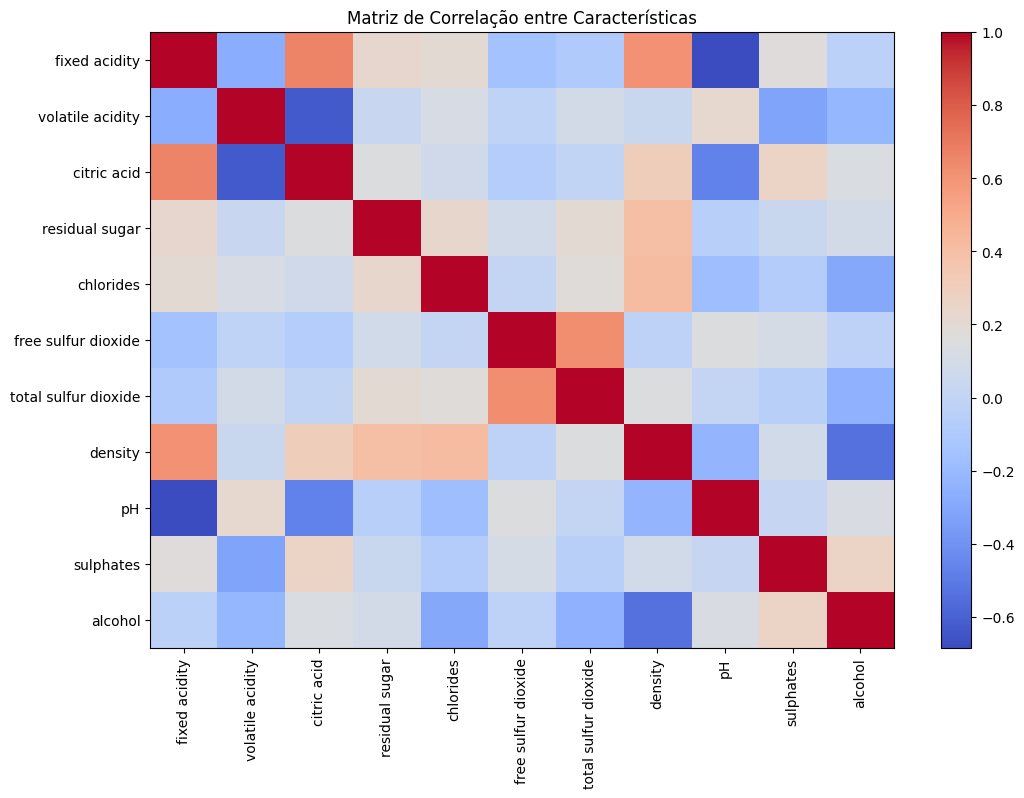

C:\Users\gcorr\AppData\Local\Temp\ipykernel_3648\3052720508.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, df[(df[column] < lower_bound) | (df[column] > upper_bound)]])



Análise do Gráfico de Dispersão os primeiros dois parâmetros do PCA aplicado


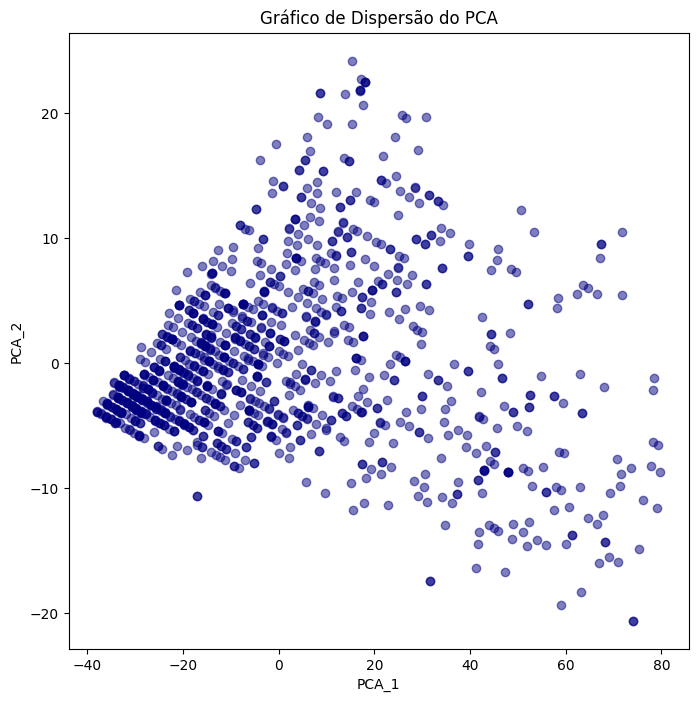


Análise Comparativa entre os BoxPlots Sem e Com Remoção de Outliers


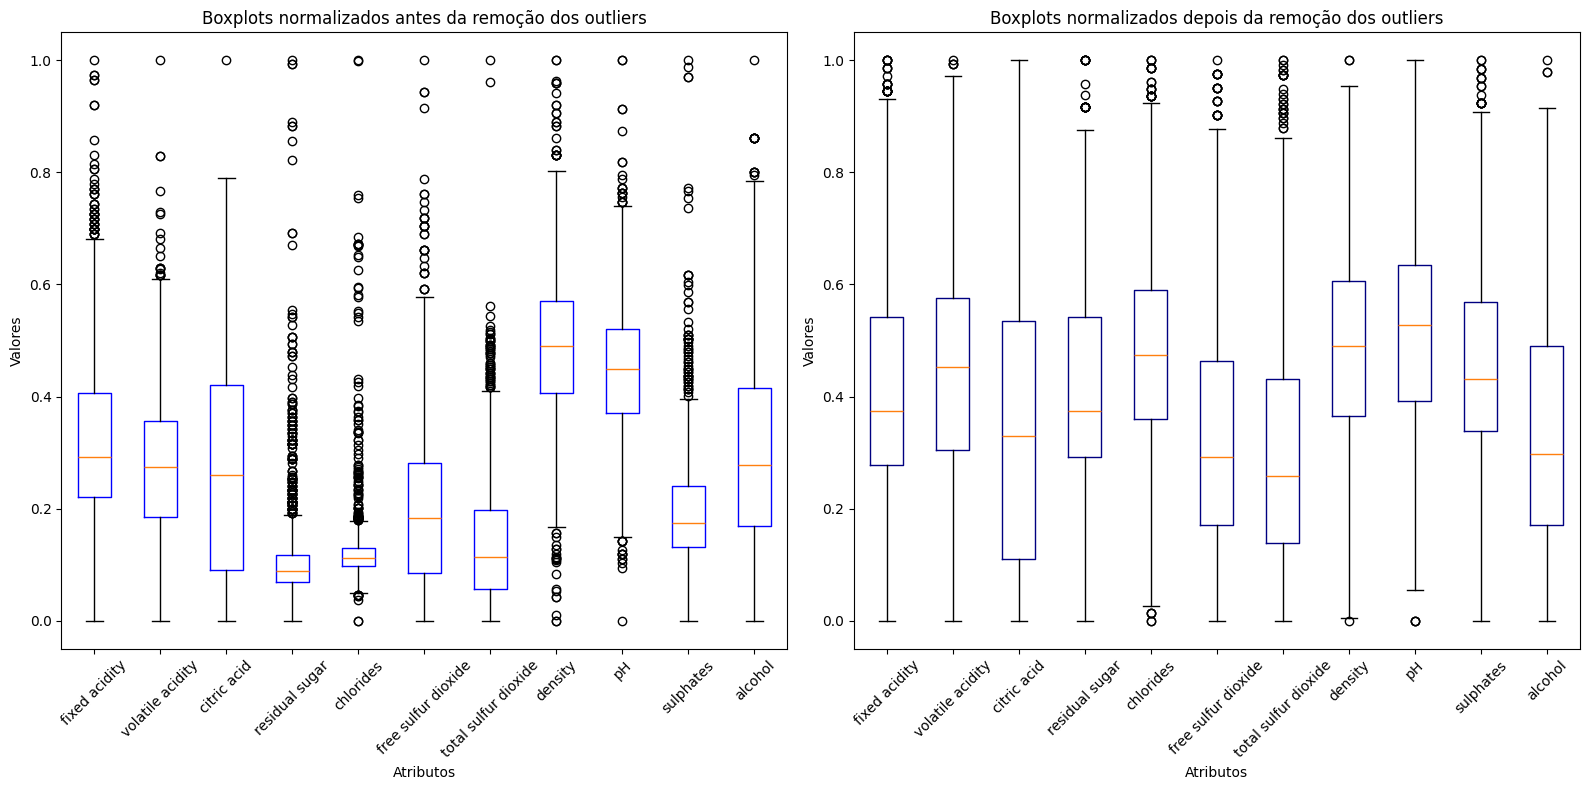


Análise da Acurácia de cada um dos Ks Vizinhos


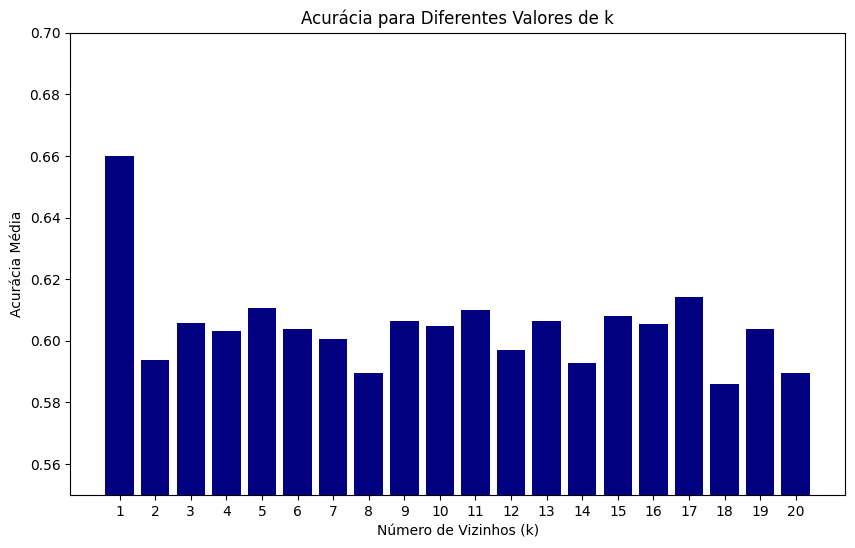


Análise Comparativa entre o algoritmo KNN (objetivo deste trabalho) com Árvore de Decisões


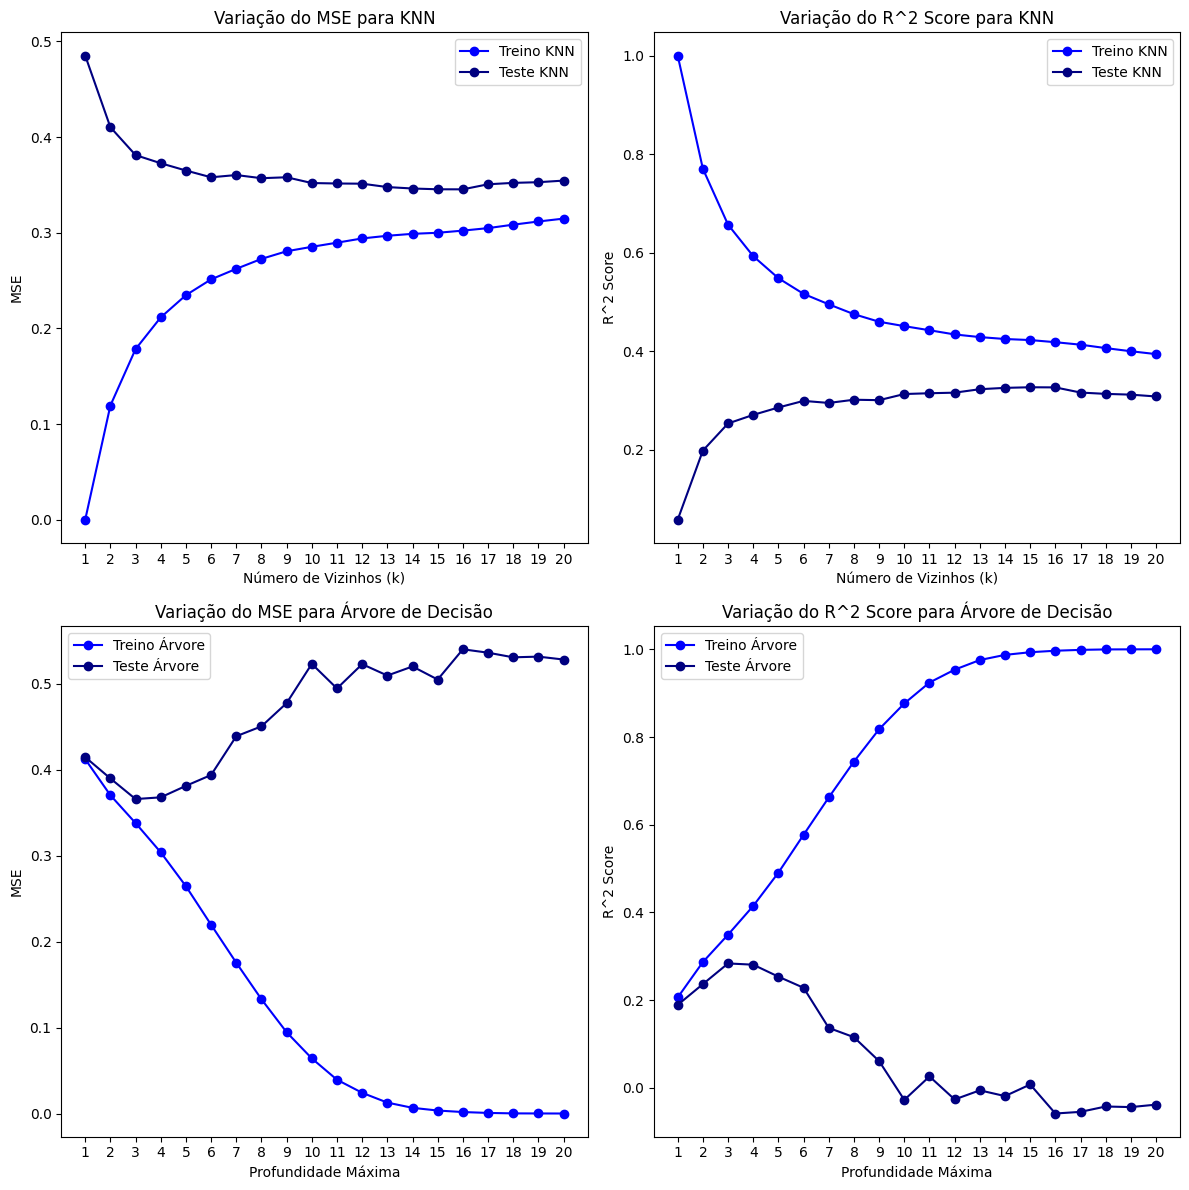

Melhores Hiperparâmetros: {'n_neighbors': 12}
Melhores Hiperparâmetros: {'max_depth': 3}

RESULTADOS DO MODELO:
Melhor valor de k pela acurácia: 1
Maior acurácia: 0.6610169491525424
MSE no Teste: 0.2618585216572505
MSE no Treino 0.297867326499352
R² Score no Teste: 0.5117024165587845
R² Score no Treino 0.42215280019934587

PARÂMETROS NUMÉRICOS OBTIDOS NO ALGORITMO kNN DE REGRESSÃO:
Melhor valor de k pela Regressão: 12
Acurácia para o Melhor valor de k: 0.652542372881356
MSE no Treino: 0.2558818269071682
MSE no Teste: 0.36487462195480297
R² Score no Treino: 0.507600137828171
R² Score no Teste: 0.28804698290010894

Análise Comparativa da Curva de Aprendizagem de Teste e Treino


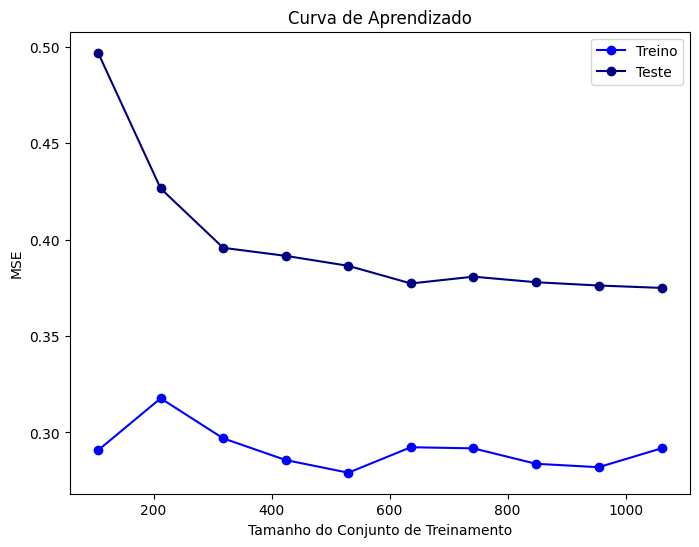

In [75]:
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor

plt.close('all')
print('Resultados Obtidos no Programa: ')

# Desativa a verificação do certificado SSL
ssl._create_default_https_context = ssl._create_unverified_context

def load_data(url):
    """Carrega os dados do conjunto de dados."""
    return pd.read_csv(url, delimiter=';')

def display_initial_table(df):
    """Exibe a tabela inicial com os primeiros 5 e últimos 5 valores."""
    print("\nTabela Inicial (Primeiros 5 e Últimos 5 valores):")
    display(pd.concat([df.head(), pd.DataFrame(["..."] * (len(df) - 10)).set_index([0]), df.tail()]))

def explore_statistics(df):
    """Realiza a análise estatística dos parâmetros."""
    print("\nAnálise Estatística dos Parâmetros (Original):")
    display(df.describe().transpose())

def remove_outliers(df):
    """Identifica e remove outliers do DataFrame original."""
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.columns:
        if df[column].dtype != 'object':
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = pd.concat([outliers, df[(df[column] < lower_bound) | (df[column] > upper_bound)]])
    df_no_outliers = df.drop(outliers.index)
    return df_no_outliers

def apply_pca(df, num_components=5):
    """Aplica PCA com o número ajustado de componentes."""
    pca = PCA(n_components=num_components)
    df_pca = pca.fit_transform(df.drop('quality', axis=1))
    df_pca = pd.DataFrame(df_pca, columns=[f'PCA_{i+1}' for i in range(df_pca.shape[1])])
    return df_pca

def display_pca_scatter_plot(df_pca):
    """Exibe o gráfico de dispersão do PCA."""
    plt.figure(figsize=(8, 8))
    plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], alpha=0.5, c='navy')
    plt.title('Gráfico de Dispersão do PCA')
    plt.xlabel('PCA_1')
    plt.ylabel('PCA_2')
    plt.show()

def normalize_data(df, df_no_outliers):
    """Normaliza os dados para facilitar a visualização."""
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df.drop('quality', axis=1)), columns=df.columns[:-1])
    df_no_outliers_normalized = pd.DataFrame(scaler.fit_transform(df_no_outliers.drop('quality', axis=1)), columns=df_no_outliers.columns[:-1])
    return df_normalized, df_no_outliers_normalized

def display_boxplots(df_normalized, df_no_outliers_normalized):
    """Exibe boxplots normalizados antes e depois da remoção dos outliers."""
    plt.figure(figsize=(16, 8))

    # Antes da remoção dos outliers
    plt.subplot(1, 2, 1)
    plt.boxplot(df_normalized.values, boxprops=dict(color='blue'))
    plt.title('Boxplots normalizados antes da remoção dos outliers')
    plt.xlabel('Atributos')
    plt.ylabel('Valores')
    plt.xticks(range(1, len(df_normalized.columns) + 1), df_normalized.columns, rotation=45)

    # Depois da remoção dos outliers
    plt.subplot(1, 2, 2)
    plt.boxplot(df_no_outliers_normalized.values, boxprops=dict(color='navy'))
    plt.title('Boxplots normalizados depois da remoção dos outliers')
    plt.xlabel('Atributos')
    plt.ylabel('Valores')
    plt.xticks(range(1, len(df_no_outliers_normalized.columns) + 1), df_no_outliers_normalized.columns, rotation=45)

    plt.tight_layout()
    plt.show()

def handle_missing_values(df):
    """Lida com valores nulos usando imputação KNN."""
    X = df.drop('quality', axis=1)
    y = df['quality']
    knn_imputer = KNNImputer(n_neighbors=8)
    X_imputed = pd.DataFrame(knn_imputer.fit_transform(X), columns=X.columns)
    return X_imputed, y

def standardize_data(X_imputed):
    """Padroniza os dados."""
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)
    return X_scaled

def train_and_evaluate_model(X_scaled, y, valores_k):
    """Treina e avalia o modelo KNN para diferentes valores de k."""
    mse_values_train = []
    mse_values_test = []
    r2_values_train = []
    r2_values_test = []

    # Validação cruzada
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for k in valores_k:
        modelo_knn = KNeighborsRegressor(n_neighbors=k)
        
        mse_train = []
        mse_test = []
        r2_train = []
        r2_test = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            modelo_knn.fit(X_train, y_train)
            y_pred_train = modelo_knn.predict(X_train)
            y_pred_test = modelo_knn.predict(X_test)

            mse_train.append(mean_squared_error(y_train, y_pred_train))
            mse_test.append(mean_squared_error(y_test, y_pred_test))

            r2_train.append(r2_score(y_train, y_pred_train))
            r2_test.append(r2_score(y_test, y_pred_test))

        mse_values_train.append(np.mean(mse_train))
        mse_values_test.append(np.mean(mse_test))
        r2_values_train.append(np.mean(r2_train))
        r2_values_test.append(np.mean(r2_test))

    return mse_values_train, mse_values_test, r2_values_train, r2_values_test

def plot_performance_graphs(valores_k, mse_values_train, mse_values_test, r2_values_train, r2_values_test):
    """Exibe os gráficos de desempenho em relação ao valor de k."""
    # Valores de max_depth para avaliação
    max_depth_values = list(range(1, 21))

    # Treina e avalia o modelo de Árvore de Decisão para diferentes valores de max_depth
    mse_values_train_tree, mse_values_test_tree, r2_values_train_tree, r2_values_test_tree = train_and_evaluate_decision_tree(X_scaled, y, max_depth_values)

    # Gráficos para KNN e Árevore de Decisão
    plt.figure(figsize=(12, 12))

    # Gráficos para KNN
    # MSE para KNN
    plt.subplot(2, 2, 1)
    plt.plot(valores_k, mse_values_train, label='Treino KNN', marker='o', color='blue')
    plt.plot(valores_k, mse_values_test, label='Teste KNN', marker='o', color='navy')
    plt.title('Variação do MSE para KNN')
    plt.xlabel('Número de Vizinhos (k)')
    plt.ylabel('MSE')
    plt.xticks(valores_k)
    plt.legend()

    # R^2 Score para KNN
    plt.subplot(2, 2, 2)
    plt.plot(valores_k, r2_values_train, label='Treino KNN', marker='o', color='blue')
    plt.plot(valores_k, r2_values_test, label='Teste KNN', marker='o', color='navy')
    plt.title('Variação do R^2 Score para KNN')
    plt.xlabel('Número de Vizinhos (k)')
    plt.ylabel('R^2 Score')
    plt.xticks(valores_k)
    plt.legend()

    # Gráficos para Árvore de Decisão
    # MSE para Árvore de Decisão
    plt.subplot(2, 2, 3)
    plt.plot(max_depth_values, mse_values_train_tree, label='Treino Árvore', marker='o', color='blue')
    plt.plot(max_depth_values, mse_values_test_tree, label='Teste Árvore', marker='o', color='navy')
    plt.title('Variação do MSE para Árvore de Decisão')
    plt.xlabel('Profundidade Máxima')
    plt.ylabel('MSE')
    plt.xticks(max_depth_values)
    plt.legend()

    # R^2 Score para Árvore de Decisão
    plt.subplot(2, 2, 4)
    plt.plot(max_depth_values, r2_values_train_tree, label='Treino Árvore', marker='o', color='blue')
    plt.plot(max_depth_values, r2_values_test_tree, label='Teste Árvore', marker='o', color='navy')
    plt.title('Variação do R^2 Score para Árvore de Decisão')
    plt.xlabel('Profundidade Máxima')
    plt.ylabel('R^2 Score')
    plt.xticks(max_depth_values)
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(df):
    """Exibe a matriz de correlação entre as características."""
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.title('Matriz de Correlação entre Características')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

def hyperparameter_tuning(X_train, y_train, model):
    """Realiza ajuste de hiperparâmetros usando GridSearchCV."""
    if model == 'knn':
        param_grid = {'n_neighbors': list(range(1, 21))}
        model_instance = KNeighborsRegressor()
    elif model == 'tree':
        param_grid = {'max_depth': list(range(1, 21))}
        model_instance = DecisionTreeRegressor(random_state=42)
    else:
        raise ValueError("Modelo não suportado. Escolha entre 'knn' e 'tree'.")

    grid_search = GridSearchCV(model_instance, param_grid, scoring='neg_mean_squared_error', cv=10)
    grid_search.fit(X_train, y_train)
    
    # Exibe os melhores hiperparâmetros encontrados
    print("Melhores Hiperparâmetros:", grid_search.best_params_)
    
    # Retorna o modelo com os melhores hiperparâmetros
    return grid_search.best_estimator_

def plot_learning_curve(model, X, y):
    """Exibe a curva de aprendizado."""
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Treino', marker='o', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Teste', marker='o', color='navy')
    plt.title('Curva de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

def plot_accuracy_bars(valores_k, X_scaled, y, kf):
    """Plota o gráfico de barras com a acurácia para diferentes valores de k."""
    accuracy_values = []

    for k in valores_k:
        modelo_knn = KNeighborsRegressor(n_neighbors=k)
        accuracy_k = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            modelo_knn.fit(X_train, y_train)
            y_pred_test = modelo_knn.predict(X_test)
            accuracy_k.append(accuracy_score(y_test, np.round(y_pred_test).astype(int)))

        accuracy_values.append(np.mean(accuracy_k))

    # Plotando o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(valores_k, accuracy_values, color='navy')
    plt.title('Acurácia para Diferentes Valores de k')
    plt.xlabel('Número de Vizinhos (k)')
    plt.xticks(valores_k)  # Garante que apenas valores inteiros são exibidos no eixo X
    plt.ylabel('Acurácia Média')
    plt.ylim(0.55, 0.7)  # Defina os limites do eixo Y
    plt.show()

def train_and_evaluate_decision_tree(X_scaled, y, max_depth_values):
    """Treina e avalia o modelo de Árvore de Decisão para diferentes valores de max_depth."""
    mse_values_train = []
    mse_values_test = []
    r2_values_train = []
    r2_values_test = []

    # Validação cruzada
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for max_depth in max_depth_values:
        modelo_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        mse_train = []
        mse_test = []
        r2_train = []
        r2_test = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            modelo_tree.fit(X_train, y_train)
            y_pred_train = modelo_tree.predict(X_train)
            y_pred_test = modelo_tree.predict(X_test)

            mse_train.append(mean_squared_error(y_train, y_pred_train))
            mse_test.append(mean_squared_error(y_test, y_pred_test))

            r2_train.append(r2_score(y_train, y_pred_train))
            r2_test.append(r2_score(y_test, y_pred_test))

        mse_values_train.append(np.mean(mse_train))
        mse_values_test.append(np.mean(mse_test))
        r2_values_train.append(np.mean(r2_train))
        r2_values_test.append(np.mean(r2_test))

    return mse_values_train, mse_values_test, r2_values_train, r2_values_test

# URL do conjunto de dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Carrega os dados originais
df_wine = load_data(url)

# Exibe a tabela inicial
print("\nTabela dos Dados de Vinho Baixada")
display_initial_table(df_wine)

# Realiza a análise estatística dos parâmetros
print("\nAnálise Estatística de cada um dos Dados")
explore_statistics(df_wine)

# Exibe a matriz de correlação
print("\nMatriz de Correlação dos Dados do Banco Baixado (se existe relações de dependência e independência)")
plot_correlation_matrix(X_imputed)

# Identifica e remove outliers
df_wine_no_outliers = remove_outliers(df_wine)

# Aplica PCA com número ajustado de componentes
df_wine_pca = apply_pca(df_wine_no_outliers, num_components=5)

# Exibe o gráfico de dispersão do PCA
print("\nAnálise do Gráfico de Dispersão os primeiros dois parâmetros do PCA aplicado")
display_pca_scatter_plot(df_wine_pca)

# Normaliza os dados para facilitar a visualização
df_wine_normalized, df_wine_no_outliers_normalized = normalize_data(df_wine, df_wine_no_outliers)

# Exibe boxplots normalizados antes e depois da remoção dos outliers
print("\nAnálise Comparativa entre os BoxPlots Sem e Com Remoção de Outliers")
display_boxplots(df_wine_normalized, df_wine_no_outliers_normalized)

# Lida com valores nulos usando imputação KNN
X_imputed, y = handle_missing_values(df_wine_no_outliers)

# Padroniza os dados
X_scaled = standardize_data(X_imputed)

# Dividir dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
valores_k = list(range(1, 21))

# Exibindo o gráfico de barras dos valores acurácia dos Ks vizinhos
print("\nAnálise da Acurácia de cada um dos Ks Vizinhos")
plot_accuracy_bars(valores_k, X_scaled, y, kf)

# Treina e avalia o modelo KNN para diferentes valores de k
mse_values_train, mse_values_test, r2_values_train, r2_values_test = train_and_evaluate_model(X_scaled, y, valores_k)

# Exibe os gráficos de desempenho em relação ao valor de k
print("\nAnálise Comparativa entre o algoritmo KNN (objetivo deste trabalho) com Árvore de Decisões")
plot_performance_graphs(valores_k, mse_values_train, mse_values_test, r2_values_train, r2_values_test)

# Ajuste de hiperparâmetros para KNN
best_model_knn = hyperparameter_tuning(X_train, y_train, model='knn')

# Ajuste de hiperparâmetros para Árvore de Decisão
best_model_tree = hyperparameter_tuning(X_train, y_train, model='tree')

# Treina o melhor modelo com o conjunto de treinamento completo
best_model.fit(X_scaled, y)

# Avalia o melhor modelo no conjunto de teste
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, np.round(y_pred_test).astype(int))

# Avalia o melhor modelo no conjunto de teste para k = 12 - Que o código já acusava
best_model_knn.n_neighbors = 12  # Configura o modelo com o valor desejado de k
best_model_knn.fit(X_train, y_train)
y_pred_test_k12 = best_model_knn.predict(X_test)
accuracy_test_k12 = accuracy_score(y_test, np.round(y_pred_test_k12).astype(int))

# Encontrando o valor de k com maior acurácia
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Adicione esta linha
best_k_accuracy = valores_k[np.argmax(accuracy_test)]

# Exibe resultados do Modelo Geral
print("\nRESULTADOS DO MODELO:")
print("Melhor valor de k pela acurácia:", best_k_accuracy)
print("Maior acurácia:", accuracy_test)
print("MSE no Teste:", mse_test)
print("MSE no Treino", mse_train)
print("R² Score no Teste:", r2_test)
print("R² Score no Treino", r2_train)

# Exibe todos os parâmetros numéricos obtidos a partir da kNN de Regressão
print("\nPARÂMETROS NUMÉRICOS OBTIDOS NO ALGORITMO kNN DE REGRESSÃO:")
print("Melhor valor de k pela Regressão:", best_model_knn.n_neighbors)
print("Acurácia para o Melhor valor de k:", accuracy_test_k12)
print("MSE no Treino:", np.mean(mse_values_train))
print("MSE no Teste:", np.mean(mse_values_test))
print("R² Score no Treino:", np.mean(r2_values_train))
print("R² Score no Teste:", np.mean(r2_values_test))

# Usando a função plot_learning_curve para exibir a curva de aprendizado
print("\nAnálise Comparativa da Curva de Aprendizagem de Teste e Treino")
plot_learning_curve(best_model, X_scaled, y)



CONSIDERAÇÕES:

O código apresentado aborda o problema de regressão utilizando o algoritmo k-NN (k-Nearest Neighbors) para um conjunto de dados específico de vinhos vermelhos. O código realiza várias etapas, incluindo a carga dos dados, análise exploratória, pré-processamento (remoção de outliers, aplicação do PCA, normalização, etc.), treinamento do modelo k-NN para diferentes valores de k, ajuste de hiperparâmetros, aplicação do algoritmo DecisionTree de forma comparativa ao kNN e avaliação do desempenho do modelo focal em aplicação. 

Esse código abrange desde o carregamento dos dados até a avaliação detalhada do desempenho do modelo, passando por várias etapas de pré-processamento e análise.


---
